In [7]:
def poly_to_expression(p):
    p = SR(p)
    cc = p.coefficients()
    q = 0
    y = var('y')
    for c, i in cc:        
        q+= AA(c).radical_expression()*(y^i)
    return q

In [8]:
var('c')
var('t')
assume(t>0,t<1)
assume(c>0)

def simplify_local(p, repeat=2):
    c = var('c')    
    i=0
    while i<repeat:
        p = p.collect(c).combine(deep=True).simplify_real()
        lst0 = p.coefficients(c)    
        lst = []    
        for l0 in lst0:
            expr0, k = l0
            lst1 = expr0.operands()
            if len(lst1)<2:
                lst.append(expr0*c^k)
            for expr1 in lst1:
                try:
                    expr1 = expr1.canonicalize_radical().factor()
                except AttributeError:
                    continue
                #if len(p.variables())==1:
                #    pass
                expr1 = expr1*c^k
                lst.append(expr1)
        p = sum(lst).collect(c).combine(deep=True)
        i+=1
    return p

def count_sign_changes(p):
    l = [c for c in p if not c.is_zero()]
    changes = [l[i]*l[i + 1] < 0 for i in range(len(l) - 1)]

    return changes.count(True)

def sturm(p, a, b):
    assert p.degree()> 2
    assert not (p(a) == 0)
    assert not (p(b) == 0)
    assert a <= b
    remains = [p, diff(p)]
    
    for i in range(p.degree() - 1):
        r = -(remains[i] % remains[i + 1])
        if r.is_zero():
            #print (r)
            break
            
        remains.append(r)
    evals = [[], []]
    for q in remains:
        evals[0].append(q(a))
        evals[1].append(q(b))
    return count_sign_changes(evals[0])-count_sign_changes(evals[1])


def expr_to_poly(p, ring):    
    cc = p.coefficients()
    Q = 0
    y = polygen(ring, 'y')
    for c, i in cc:        
        Q+= ring(c)*y^i
    return Q

#### Bloco 1

In [9]:
B1 = load('blocks/linear_block_1'); show(B1)

<ipython-input-9-9bda1abbd480>:1: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  B1 = load('blocks/linear_block_1'); show(B1)


[                                                                                                      12*c - 3/8*sqrt(2)   12*c - 3*t/(3*t^2 + 2*t + 3)^(3/2) - 9/(3*t^2 + 2*t + 3)^(3/2) + 1/3*sqrt(3)*t/abs(t - 1)^3 - 1/3*sqrt(3)/abs(t - 1)^3]
[12*c*t - 9*t/(3*t^2 + 2*t + 3)^(3/2) - 3/(3*t^2 + 2*t + 3)^(3/2) - 1/3*sqrt(3)*t/abs(t - 1)^3 + 1/3*sqrt(3)/abs(t - 1)^3                                                                                                 12*c*t - 3/8*sqrt(2)/t^2]

In [10]:
# a00, a01, a10, a11 = B1[0,0], B1[0,1], B1[1,0], B1[1,1]
# f = -a01/a00
# f_simpl = simplify_local(-a01)/a00
# show(f_simpl.expand())
# print(latex(f_simpl.expand()))
#bool(f==f_simpl)
# print(latex(simplify_local(b01))); print(bool(simplify_local(b01)==b01))
# print(latex((b10.combine().simplify()))); bool(b10.combine().simplify()==b10)

In [11]:
p1 = simplify_local(B1.det());print(bool(p1==B1.det())); show(p1)
save(p1, 'p1_tetraedro')

True


-1/2*(9*sqrt(2)*t - 72*(t^2 + 6*t + 1)/(3*t^2 + 2*t + 3)^(3/2) - 8*sqrt(3)/(t - 1) + 9*sqrt(2)/t^2)*c - 9*(3*t + 1)*(t + 3)/(3*t^2 + 2*t + 3)^3 - 2*sqrt(3)/((3*t^2 + 2*t + 3)^(3/2)*(t - 1)) + 9/32/t^2 + 1/3/(t - 1)^4

### Provar Lema 2

1. Estudar se $\alpha_1$ se anula e onde.

In [12]:
α0 = p1.coefficients()[0][0]
α1 = p1.coefficients()[1][0]

show(α0); show(α1)
#print(α0); print(α1)

-9*(3*t + 1)*(t + 3)/(3*t^2 + 2*t + 3)^3 - 2*sqrt(3)/((3*t^2 + 2*t + 3)^(3/2)*(t - 1)) + 9/32/t^2 + 1/3/(t - 1)^4

-9/2*sqrt(2)*t + 36*(t^2 + 6*t + 1)/(3*t^2 + 2*t + 3)^(3/2) + 4*sqrt(3)/(t - 1) - 9/2*sqrt(2)/t^2

#### O gráfico de $\alpha_1$:

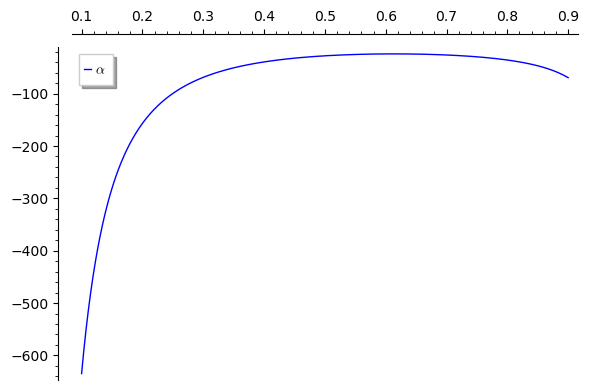

In [13]:
show(plot(α1, (x,0.1, 0.9), legend_label=r'$\alpha$'))

#### Usando limites

In [14]:
limit(α1, t=0, dir='+'), limit(α1, t=1, dir='-') # positivos nos extremos

(-Infinity, -Infinity)

#### Mudança de variável:  $t=\frac{1}{3} \, \sqrt{2} {\left(u - \frac{1}{u}\right)} - \frac{1}{3}$

In [15]:
var('u')
α1_u = α1.subs(t=(sqrt(8)/6)*(u-1/u) - 1/3)
α1_u = α1_u.expand().factor().canonicalize_radical().numerator(); show(α1_u.canonicalize_radical().simplify_full())


-6*sqrt(3)*sqrt(2)*u^14 + 42*sqrt(3)*u^13 - 3*(13*sqrt(3)*sqrt(2) - 48)*u^12 - 6*u^11*(7*sqrt(3) - 48*sqrt(2)) + 3*(43*sqrt(3)*sqrt(2) - 1224)*u^10 - 30*u^9*(7*sqrt(3) - 60*sqrt(2)) + 36*(15*sqrt(3)*sqrt(2) + 236)*u^8 - 4320*sqrt(2)*u^7 + 36*(15*sqrt(3)*sqrt(2) - 238)*u^6 + 6*u^5*(35*sqrt(3) + 348*sqrt(2)) + 3*(43*sqrt(3)*sqrt(2) + 1296)*u^4 + 6*u^3*(7*sqrt(3) + 72*sqrt(2)) - 39*sqrt(3)*sqrt(2)*u^2 - 42*sqrt(3)*u - 6*sqrt(3)*sqrt(2)

In [16]:
α1_AA = expr_to_poly(α1_u, AA) # transforma os coeficientes para AA
st0 = solve(0 == (sqrt(8)/6)*(u-1/u) - 1/3, u) # obtem os valores de u para t=0
st1 = solve(1 == (sqrt(8)/6)*(u-1/u) - 1/3, u) # obtem os valores de u para t=1
show(st0); show(st1)

[u == -1/2*sqrt(2), u == sqrt(2)]

[u == -1/2*sqrt(2)*(sqrt(6) - 2), u == 1/2*sqrt(2)*(sqrt(6) + 2)]

### Teorema de Sturn

In [17]:
u0 = st0[1].rhs() # positivo
u1 = st1[1].rhs() # positivo
sturm(α1_AA, AA(u0), AA(u1))

0

### Conclusão

-  Após a mudança de variável $t=\frac{1}{3} \, \sqrt{2} {\left(u - \frac{1}{u}\right)} - \frac{1}{3}$ obtemos um polinômio  na variável $u$. **Teorema de Sturm** afirma que não existe raízes entre $\sqrt{2}$ e $\frac{\sqrt{2}}{2} {\left(\sqrt{6} + 2\right)}$. Consequentemente, não se anula entre $0 < t < 1$. Além disso, $\alpha_1(t)<0$ nesse intervalo, já que $\displaystyle\lim_{t \to 0^+}\alpha_1(t)=\displaystyle\lim_{t \to 1^-}\alpha_1(t)=-\infty$.

#### Provar Lema 1
2. Provar que $c(t) = -\dfrac{\alpha_0(t)}{\alpha_1(t)}>0$ em $(0,1)$.

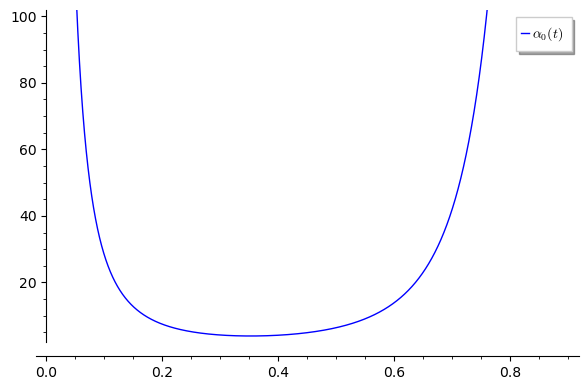

In [18]:
show(plot(α0, (x,0, 0.9), ymax=100, legend_label=r'$\alpha_0(t)$'))

#### Usando limites

In [19]:
limit(α0, t=0, dir='+'), limit(α0, t=1, dir='-') # sempre positivo nos extremos

(+Infinity, +Infinity)

#### Mudança de variável:  $t=\frac{1}{3} \, \sqrt{2} {\left(u - \frac{1}{u}\right)} - \frac{1}{3}$

In [20]:
var('u')
α0_u = α0.subs(t=(sqrt(8)/6)*(u-1/u) - 1/3)
α0_u = α0_u.expand().factor().canonicalize_radical().numerator(); show(α0_u)

-81*u^24 + 810*sqrt(2)*u^23 - 4833*u^22 - 972*sqrt(2)*u^21 + 9477*u^20 + 256770*sqrt(2)*u^19 - 1733643*u^18 + 1413936*sqrt(2)*u^17 + 3448278*u^16 - 5534892*sqrt(2)*u^15 - 3077514*u^14 + 8276472*sqrt(2)*u^13 + 2820906*u^12 - 5711148*sqrt(2)*u^11 - 3340278*u^10 + 1548720*sqrt(2)*u^9 + 1995435*u^8 + 426114*sqrt(2)*u^7 + 96795*u^6 + 14580*sqrt(2)*u^5 + 6561*u^4 + 810*sqrt(2)*u^3 + 81*u^2

In [21]:
α0_AA = expr_to_poly(α0_u, AA)                 # transforma os coeficientes para AA
st0 = solve(0 == (sqrt(8)/6)*(u-1/u) - 1/3, u) # obtem os valores de u para t=0
st1 = solve(1 == (sqrt(8)/6)*(u-1/u) - 1/3, u) # obtem os valores de u para t=1
show(st0); show(st1)

[u == -1/2*sqrt(2), u == sqrt(2)]

[u == -1/2*sqrt(2)*(sqrt(6) - 2), u == 1/2*sqrt(2)*(sqrt(6) + 2)]

#### Teorema de Sturn

In [22]:
u00 = st0[1].rhs() # positivo
u10 = st1[1].rhs()
sturm(α0_AA, AA(u00), AA(4)) # aumentei o intervalo a direita de (1/2)sqrt(2)*(sqrt(6) + 2). No caso, (sqrt(2), 4).

1

In [23]:
α0_AA(u10).is_zero() # u= (1/2)sqrt(2)*(sqrt(6) + 2) é um zero

True

In [24]:
bool(u10==sqrt(2)+sqrt(3))

True

In [25]:
y = polygen(AA, 'y');
show(α0_AA)
show(poly_to_expression(α0_AA))
g=y-AA(sqrt(2)+sqrt(3));
show(g)

-81*y^24 + 1145.512985522207?*y^23 - 4833*y^22 - 1374.615582626649?*y^21 + 9477*y^20 + 363127.6164105397?*y^19 - 1733643*y^18 + 1.999607467527565?e6*y^17 + 3448278*y^16 - 7.827519332670345?e6*y^15 - 3077514*y^14 + 1.170469895100118?e7*y^13 + 2820906*y^12 - 8.076782958319977?e6*y^11 - 3340278*y^10 + 2.190220828318460?e6*y^9 + 1995435*y^8 + 602616.1979170490?*y^7 + 96795*y^6 + 20619.23373939973?*y^5 + 6561*y^4 + 1145.512985522207?*y^3 + 81*y^2

-81*y^24 + 810*sqrt(2)*y^23 - 4833*y^22 - 972*sqrt(2)*y^21 + 9477*y^20 + 256770*sqrt(2)*y^19 - 1733643*y^18 + 1413936*sqrt(2)*y^17 + 3448278*y^16 - 5534892*sqrt(2)*y^15 - 3077514*y^14 + 8276472*sqrt(2)*y^13 + 2820906*y^12 - 5711148*sqrt(2)*y^11 - 3340278*y^10 + 1548720*sqrt(2)*y^9 + 1995435*y^8 + 426114*sqrt(2)*y^7 + 96795*y^6 + 14580*sqrt(2)*y^5 + 6561*y^4 + 810*sqrt(2)*y^3 + 81*y^2

y - 3.146264369941973?

In [26]:
h=(α0_AA).quo_rem(g);
show(h)

AttributeError: 'sage.symbolic.expression.Expression' object has no attribute 'quo_rem'

In [ ]:
show(poly_to_expression(h[0]))

In [ ]:
latex(poly_to_expression(h[0]))


#### Conclusão
-  Após a mudança de variável $t=\frac{1}{3} \, \sqrt{2} {\left(u - \frac{1}{u}\right)} - \frac{1}{3}$ obtemos um polinômio  na variável $u$. Nota-se que  $u=\frac{1}{2}\sqrt{2}(\sqrt{6}+2)$ é raíz do polinômio $\alpha_0\verb|_|AA(u)$. O **Teorema de Sturn** garante que existe apenas uma raiz entre $\sqrt{2}\,$ e $4 >\,\frac{\sqrt{2}}{2}(\sqrt{6}+2).$ Logo, não existe raiz entre  $\sqrt{2}\,$ e $\,\frac{\sqrt{2}}{2}(\sqrt{6}+2)$. Consequentemente, $\alpha_1(t)$ não se anula em  $t\in (0,1)$. Além disso, $\alpha_1(t)>0$ nesse intervalo, já que $\displaystyle\lim_{t \to 0^+}\alpha_0(t)=\displaystyle\lim_{t \to 1^-}\alpha_0(t)=+\infty$. Portanto, uma vez que $\alpha_1(t)<0$ nesse intervalo, provamos que $c(t) = -\dfrac{\alpha_0(t)}{\alpha_1(t)}>0$ em $(0,1)$.

#### Provar Lema 2.

3. Provar que $a_{11}(c,t)$ é diferente de zero para todo $t\in (0, 1)$.


#### Mudança de variável:  $t=\frac{1}{3} \, \sqrt{2} {\left(u - \frac{1}{u}\right)} - \frac{1}{3}$

In [ ]:
a11 = B1[0,0].subs(c = -α0/α1); 
a11_u = a11.simplify_full().subs(t=(sqrt(8)/6)*(u-1/u) - 1/3) #show(simplify_local(a11))
a11_u = a11_u.expand().factor().canonicalize_radical().numerator(); show(a11_u)

In [27]:
a11_AA = expr_to_poly(a11_u, AA)                 # transforma os coeficientes para AA
st0 = solve(0 == (sqrt(8)/6)*(u-1/u) - 1/3, u) # obtem os valores de u para t=0
st1 = solve(1 == (sqrt(8)/6)*(u-1/u) - 1/3, u) # obtem os valores de u para t=1
show(st0); show(st1)

NameError: name 'a11_u' is not defined

#### Teorema de Sturn

In [ ]:
u011 = st0[1].rhs() # positivo
u111 = st1[1].rhs()
sturm(a11_AA, AA(13/10), AA(u111)) # possui raíz em a= u011

In [ ]:
bool(a11_AA(u011)==0) # u=sqrt(2)~~1.41421356237310 é raíz do polinômio.

#### Conclusão

- $u=\sqrt{2}$ é raíz do polinômio a11_AA(u). O **Teorema de Sturn** garante que existe apenas uma raiz entre $\frac{13}{10} < \sqrt{2}\,$ e $\,\frac{\sqrt{2}}{2}(\sqrt{6}+2)$. Logo, não existe raiz entre  $\sqrt{2}\,$ e $\,\frac{\sqrt{2}}{2}(\sqrt{6}+2)$. Consequentemente, $a_{11}(c(t),t)$ não se anula em  $t\in (0,1)$.

### Prova Lema 2
4. Estudar o sinal de $a_{12}(c(t), t)$.

In [28]:
a12 = B1[0,1].subs(c = -α0/α1);

##### Analisando os limites

In [29]:
l1, l2 = limit(a12, t=0, dir='+'), limit(a12, t=1, dir='-') # sempre positivo nos extremos
bool(l1<0), bool(l2>0)

(True, True)

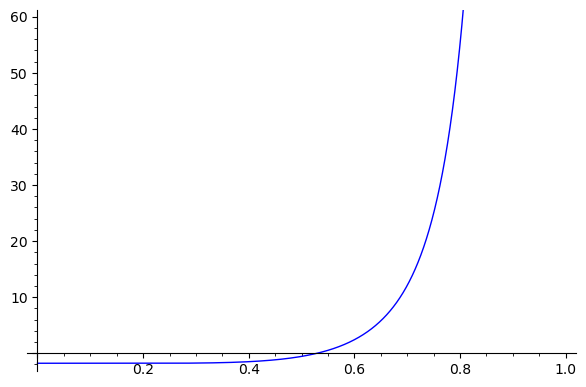

In [30]:
plot(a12, (x,0,1), ymin=-2, ymax=60)

In [ ]:
a12_u = a12.simplify_full().subs(t=(sqrt(8)/6)*(u-1/u) - 1/3) #show(simplify_local(a11))
a12_u = a12_u.expand().factor().canonicalize_radical().numerator(); show(a11_u)

In [ ]:
a12_AA = expr_to_poly(a12_u, AA)                 # transforma os coeficientes para AA
st0 = solve(0 == (sqrt(8)/6)*(u-1/u) - 1/3, u) # obtem os valores de u para t=0
st1 = solve(1 == (sqrt(8)/6)*(u-1/u) - 1/3, u) # obtem os valores de u para t=1
show(st0); show(st1)

In [ ]:
u012 = st0[1].rhs() # positivo
u112 = st1[1].rhs()
sturm(a12_AA, AA(u012), AA(u112)) # possui raíz r em (sqrt(2), (1/2)*sqrt(2)*(sqrt(6)+2))

#### Conclusão

- O polinômio a12_AA tem apenas uma raiz $r_u$ entre $\sqrt{2}\,$ e $\,\frac{\sqrt{2}}{2}(\sqrt{6}+2)$. Consequentemente, existe um único $r$ que anula $a_{11}(c(t),t)$ para $0 < t < 1$.  Já que $\displaystyle\lim_{t \to 0^+}a_{11}(c(t),t)<0$ e $\displaystyle\lim_{t \to 1^-}a_{11}(c(t),t)=+\infty$, então $a_{11}(c(t),t)<0$ em (0, r) e $a_{11}(c(t),t)>0$ em $(r, 1)$.

#### Bloco 2

In [ ]:
B2 = load('bloco_2_linear_tetraedro'); show(B2)

Simplificando as entradas da matriz para adicionar ao texto do artigo.

In [ ]:
show(B2.apply_map(lambda a: a.simplify_real().combine()))

In [ ]:
submatrizes_2x2_dets = B2.minors(2)

In [ ]:
for m in submatrizes_2x2_dets:
    show(m)

In [ ]:
p2 = submatrizes_2x2_dets[1].simplify();show(p2)

In [ ]:
q2 = 4/81*(9*t/(3*t^2 + 2*t + 3)^(3/2) - 9/(3*t^2 + 2*t + 3)^(3/2) + sqrt(3)*t/(t - 1)^3 - sqrt(3)/(t - 1)^3); show(simplify(q2))
# p2 = 4/81*q2(t)*q2(t)

In [ ]:
q2_u = q2.simplify_full().subs(t=(sqrt(8)/6)*(u-1/u) - 1/3) 
q2_u = q2_u.expand().factor().canonicalize_radical().numerator(); show(q2_u)

In [ ]:
q2_AA = expr_to_poly(q2_u, AA)                 # transforma os coeficientes para AA
st0 = solve(0 == (sqrt(8)/6)*(u-1/u) - 1/3, u) # obtem os valores de u para t=0
st1 = solve(1 == (sqrt(8)/6)*(u-1/u) - 1/3, u) # obtem os valores de u para t=1
show(st0); show(st1)

In [ ]:
u0 = st0[1].rhs() # positivo
u1 = st1[1].rhs() # positivo
sturm(q2_AA, 13/10, AA(u1))

#### Conclusão Bloco 2
- $u=\sqrt{2}$ é raíz do polinômio q2(u). O **Teorema de Sturn** garante que existe apenas uma raiz entre $\frac{13}{10} < \sqrt{2}\,$ e $\,\frac{\sqrt{2}}{2}(\sqrt{6}+2)$. Logo, não existe raiz entre  $\sqrt{2}\,$ e $\,\frac{\sqrt{2}}{2}(\sqrt{6}+2)$. Consequentemente, $p2(t)$ não se anula em  $t\in (0,1)$.